In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix, save_npz
import seaborn as sns
import os

adata_concat = sc.read_h5ad('/home/chenzhitong/czt/project_9/IH/data/IH_pro.h5ad')
IH_celltype = pd.read_csv('/home/chenzhitong/czt/project_9/IH/data/IH_pro_celltype.csv')
adata_concat.obs['cell_type'] = list(IH_celltype['type'])
adata_concat.obs['sample'] = adata_concat.obs['sample'].replace('data1', 'sample1')
adata_concat.obs['sample'] = adata_concat.obs['sample'].replace('data2', 'sample2')
adata_concat.obs['sample'] = adata_concat.obs['sample'].replace('data3', 'sample3')
adata_concat

/home/chenzhitong/anaconda3/envs/MultiGFT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 36237 × 28291
    obs: 'cell_name', 'sample', 'cell_type'
    var: 'genes'
    obsm: 'X_umap'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


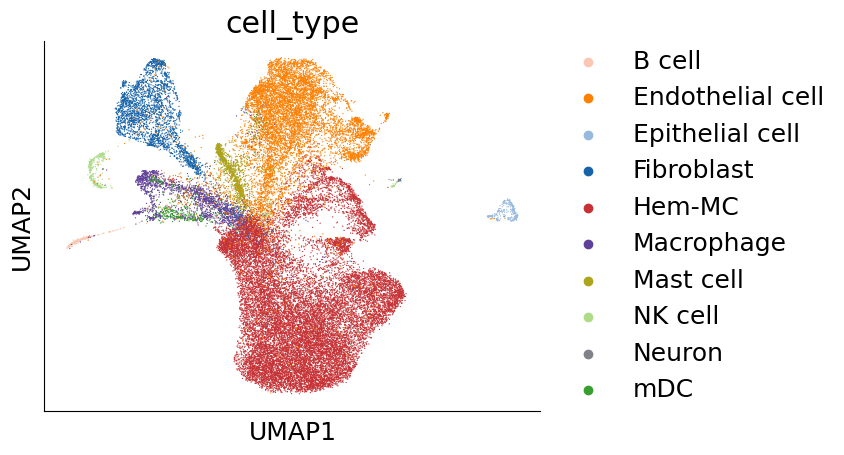

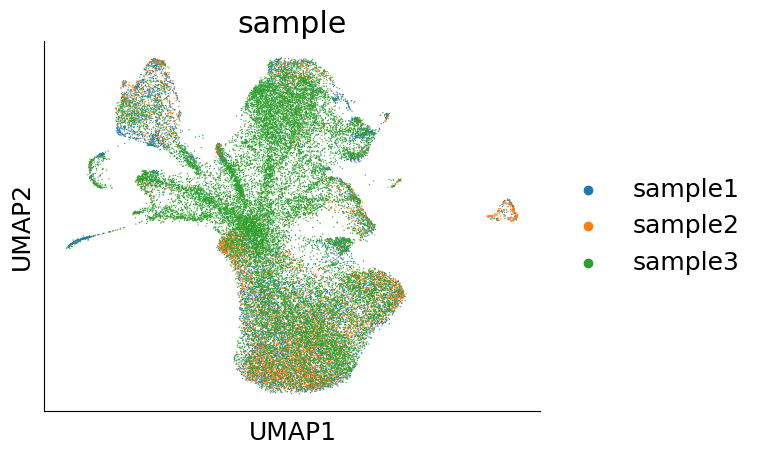

In [2]:
plt.rcParams['font.family'] = 'Arial' #sans-serif
plt.rcParams['font.size'] = 18
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

set(adata_concat.obs['cell_type'])
sc.pl.umap(adata_concat, color=['cell_type'],palette={
        "Hem-MC": (0.7765,0.1922,0.2078),
        "Fibroblast": (0.0863, 0.3882, 0.662),
        "Endothelial cell": (0.9882, 0.5019, 0.0078),
        "Epithelial cell": (0.597, 0.726, 0.871),
        "B cell": (0.9804, 0.7804, 0.7019),
        "Mast cell": (0.675, 0.644, 0.107),
        "Macrophage": (0.3804, 0.2509, 0.6000),
        "NK cell": (0.6784, 0.8588, 0.5333),
        "mDC": (0.2118, 0.6235, 0.1765),
        'Neuron': (0.5059, 0.5059, 0.5353),
        # "EC3": (0.992, 0.847, 0.271),
        # "EC2":  (0.047, 0.718, 0.876),
        # "EC1": (0.8706, 0.3471, 0.1647),
        # "Hem-MC1": (0.0863, 0.3882, 0.6627),
        # "Hem-MC2":  (0.0000, 0.4980, 0.3294),
        # "Hem-MC3": (0.484, 0.535, 1)
        },save = False)
sc.pl.umap(adata_concat, color=['sample'],save = False) # 

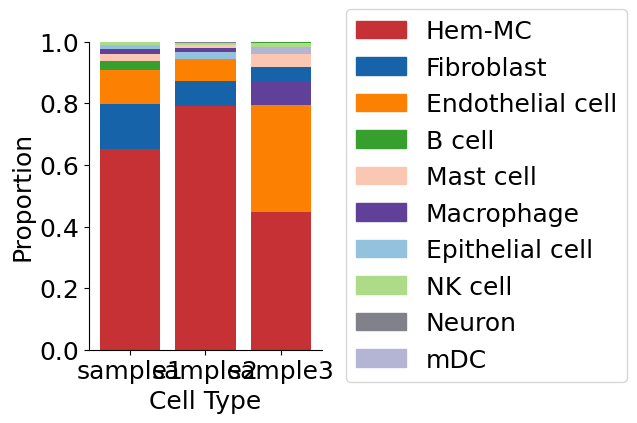

In [3]:
my_colors = [(0.2118, 0.6235, 0.1765), (0.9882, 0.5019, 0.0078), (0.5725, 0.7608, 0.8667), (0.0863, 0.3882, 0.6627), (0.7765,0.1922,0.2078),(0.3804, 0.2509, 0.6000)
             ,(0.9804, 0.7804, 0.7019),(0.6784, 0.8588, 0.5333),(0.5059, 0.5059, 0.5353),(0.7059, 0.7059, 0.8353)]
palette = sns.color_palette(my_colors)
adata_1 = adata_concat[adata_concat.obs['sample'] == 'sample1',:]
adata_2 = adata_concat[adata_concat.obs['sample'] == 'sample2',:]
adata_3 = adata_concat[adata_concat.obs['sample'] == 'sample3',:]
cell_types_1 = adata_1.obs['cell_type']
cell_types_2 = adata_2.obs['cell_type']
cell_types_3 = adata_3.obs['cell_type']
celltype_props_1 = adata_1.obs['cell_type'].value_counts(normalize=True)
celltype_props_2 = adata_2.obs['cell_type'].value_counts(normalize=True)
celltype_props_3 = adata_3.obs['cell_type'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(3, 4))
colors = {}
celltypes = celltype_props_1.index.tolist() #list(result.index)[::-1] #
values = celltype_props_1.values.tolist()#result.values[::-1] #
# values = values*100 #palette
celltype_oriid = adata_concat.obs['cell_type'].astype('category').cat.categories
indices = [celltypes.index(item) for item in celltype_oriid]
color = palette.copy()
for i in range(0,len(celltype_oriid)):
    color_id = [index for index, value in enumerate(indices) if value == i]
    color[i] = palette[color_id[0]]
    
labels = {}
for i, celltype in enumerate(celltype_props_1.index):
    colors[celltype] = color[i]#'C{}'.format(i)
    labels[celltype] = celltype
x = 'sample1'
for i, (celltype, prop) in enumerate(celltype_props_1.items()):
    ax.bar(x, [prop], bottom=sum(celltype_props_1.values[:i]), color=colors[celltype])
y = 'sample2'
for i, (celltype, prop) in enumerate(celltype_props_2.items()):
    ax.bar(y, [prop], bottom=sum(celltype_props_2.values[:i]), color=colors.get(celltype, 'grey'))
z = 'sample3'
for i, (celltype, prop) in enumerate(celltype_props_3.items()):
    ax.bar(z, [prop], bottom=sum(celltype_props_3.values[:i]), color=colors.get(celltype, 'grey'))
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[celltype]) for celltype in labels.keys()]
ax.legend(legend_handles, labels.values(), bbox_to_anchor=(1.05, 0.5), loc='center left')
ax.set_ylim([0, 1])
ax.set_xlabel('Cell Type')
ax.set_ylabel('Proportion')
# ax.set_title('Cell Type Proportions')
# plt.axis('off')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# plt.savefig('1-f.pdf',bbox_inches='tight')
plt.show()